# CSC 325 Introduction to Machine Learning

## Homework 4: MLP and Naive Bayes

### Using MLP and Naive Bayes models to perform Sentiment Analysis on Yelp reviews.

**Instructor**: Dr. Junxiu Zhou

Note that, This is an Jupyter Notebook. When you execute code within the notebook, the results appear beneath the code.

Try executing this notebook cell-by-cell by clicking the Run button or by placing your cursor inside it and pressing Shift+Enter.

**Goals**
The goals of this homework are to familarize you with:
- MLP
- Naive Bayes
- NLP (Natural Language Processing) Basics

While not completely necessary for this assignment, you may want to familiarize yourself with the following packages: numpy, scikit-learn, pandas, matplotlib.
On top of these, you will have chance to
- practice with seaborn library for plotting confusion_matrix
- know WordCloud to visualize text data in Python

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Naive Bayes Model in Real World Application: Sentiment Analysis on Yelp Data

We use the data on Kaggle can be downloaded here: https://www.kaggle.com/datasets/omkarsabnis/yelp-reviews-dataset

## DATA

In [42]:
#from google.colab import files
#uploaded = files.upload()

In [43]:
data = pd.read_csv('yelp.csv')
df_yelp = pd.DataFrame(data)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [44]:
df_yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

Since for our task we only require columns reviews and star ,So we have to delete all the other unnecessary columns

In [45]:
df_yelp = df_yelp.drop(['business_id', 'date', 'review_id', 'type', 'user_id', 'cool', 'useful', 'funny'], axis=1)

#### Observe your data

In [46]:
print(df_yelp.stars.count())
print(df_yelp.stars.value_counts())

10000
stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64


In [47]:
df_yelp.columns

Index(['stars', 'text'], dtype='object')

In [48]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10000 non-null  int64 
 1   text    10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [49]:
df_yelp.nunique(axis=0)

stars       5
text     9998
dtype: int64

In [50]:
# Visualize the labels


In [51]:
#plt.bar(5, df_yelp.stars, 4000)

#plt.show

Observe review text

In [52]:
df_yelp.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [53]:
df_yelp.text[3]

"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.\n\nThe Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.\n\nThe fenced in area is huge to let the dogs run, play, and sniff!"

In [54]:
df_yelp.text[4]

'General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I\'d be surprised if you don\'t walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it\'s how we recover from them that is important"!!!\n\nThanks to Scott and his awesome staff. You\'ve got a customer for life!! .......... :^)'

Text data visualization using **WordCloud**. It can highlight the most important and frequent words that appear in the dataset

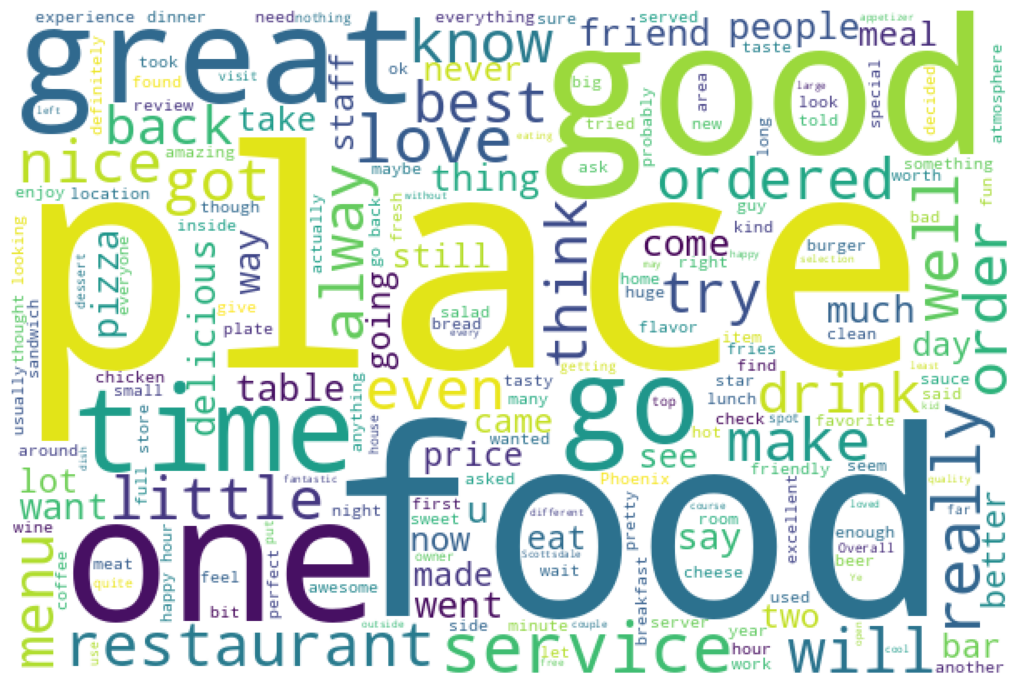

In [55]:
from wordcloud import WordCloud
review_cloud=WordCloud(width=600,height=400, background_color='white', colormap='viridis').generate(" ".join(df_yelp.text))
plt.figure(figsize=(10,8))
plt.imshow(review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Feature Engineering -- Text Features

We will use the re function, which has syntax

import re   
result = re.sub(pattern, repl, string, count=0, flags=0)


for more information please click https://lzone.de/examples/Python%20re.sub

In [56]:
import re
import string

def clean_text_func(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    # remove multiple whitespaces
    text = re.sub('\s+',' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[''""‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    # remove characters that not words
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    return text

clean_text = lambda x: clean_text_func(x)

In [57]:
df_yelp['text_cleaned'] = df_yelp.text.apply(clean_text)

In [58]:
df_yelp.head()

,stars,text,text_cleaned
0,5,My wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...,i have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...,love the gyro plate rice is so good and i also...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota and i love chaparral dog park its...
4,5,General Manager Scott Petello is a good egg!!!...,general manager scott petello is a good egg no...


In [59]:
df_yelp.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [60]:
df_yelp.text_cleaned[0]

'my wife took me here on my birthday for breakfast and it was excellent the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure our waitress was excellent and our food arrived quickly on the semibusy saturday morning it looked like the place fills up pretty quickly so the earlier you get here the better do yourself a favor and get their bloody mary it was phenomenal and simply the best ive ever had im pretty sure they only use ingredients from their garden and blend them fresh when you order it it was amazing while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete it was the best toast ive ever had anyway i cant wait to go back'

**Apply Lemmatization preprocessing in Python**

In [61]:
import nltk
from nltk.stem import WordNetLemmatizer

def clean_text_func_lemmatization(text):
    '''Tokenize the text into individual words, because lemmatization should be applied on each words'''
    tokens = nltk.word_tokenize(text)
    # define the lemmatizer to be used
    lemmatizer = WordNetLemmatizer()
    # apply stemming to each token
    text_lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    # join the text tokens back into a single string
    text = " ".join(text_lemmatized)
    return text

lemmatized_text = lambda x: clean_text_func_lemmatization(x)

In [62]:
df_yelp['text_lemmatized'] = df_yelp.text_cleaned.apply(lemmatized_text)

In [63]:
df_yelp.head()

,stars,text,text_cleaned,text_lemmatized
0,5,My wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...,i have no idea why some people give bad review...,i have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...,love the gyro plate rice is so good and i also...,love the gyro plate rice is so good and i also...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota and i love chaparral dog park its...,rosie dakota and i love chaparral dog park it ...
4,5,General Manager Scott Petello is a good egg!!!...,general manager scott petello is a good egg no...,general manager scott petello is a good egg no...


In [64]:
df_yelp.text_cleaned[0]

'my wife took me here on my birthday for breakfast and it was excellent the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure our waitress was excellent and our food arrived quickly on the semibusy saturday morning it looked like the place fills up pretty quickly so the earlier you get here the better do yourself a favor and get their bloody mary it was phenomenal and simply the best ive ever had im pretty sure they only use ingredients from their garden and blend them fresh when you order it it was amazing while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete it was the best toast ive ever had anyway i cant wait to go back'

In [65]:
df_yelp.text_lemmatized[0]

'my wife took me here on my birthday for breakfast and it wa excellent the weather wa perfect which made sitting outside overlooking their ground an absolute pleasure our waitress wa excellent and our food arrived quickly on the semibusy saturday morning it looked like the place fill up pretty quickly so the earlier you get here the better do yourself a favor and get their bloody mary it wa phenomenal and simply the best ive ever had im pretty sure they only use ingredient from their garden and blend them fresh when you order it it wa amazing while everything on the menu look excellent i had the white truffle scrambled egg vegetable skillet and it wa tasty and delicious it came with piece of their griddled bread with wa amazing and it absolutely made the meal complete it wa the best toast ive ever had anyway i cant wait to go back'

In [66]:
df_yelp.text_cleaned[5]

'quiessence is simply put beautiful full windows and earthy wooden walls give a feeling of warmth inside this restaurant perched in the middle of a farm the restaurant seemed fairly full even on a tuesday evening we had secured reservations just a couple days before my friend and i had sampled sandwiches at the farm kitchen earlier that week and were impressed enough to want to eat at the restaurant the crisp fresh veggies didnt disappoint we ordered the salad with orange and grapefruit slices and the crudites to start both were very good i didnt even know how much i liked raw radishes and turnips until i tried them with their pesto and aioli sauces for entrees i ordered the lamb and my friend ordered the pork shoulder service started out very good but trailed off quickly waiting for our food took a very long time a couple seated after us received and finished their entrees before we received ours and no one bothered to explain the situation until the maitred apologized almost  minutes

In [67]:
df_yelp.text_lemmatized[5]

'quiessence is simply put beautiful full window and earthy wooden wall give a feeling of warmth inside this restaurant perched in the middle of a farm the restaurant seemed fairly full even on a tuesday evening we had secured reservation just a couple day before my friend and i had sampled sandwich at the farm kitchen earlier that week and were impressed enough to want to eat at the restaurant the crisp fresh veggie didnt disappoint we ordered the salad with orange and grapefruit slice and the crudites to start both were very good i didnt even know how much i liked raw radish and turnip until i tried them with their pesto and aioli sauce for entree i ordered the lamb and my friend ordered the pork shoulder service started out very good but trailed off quickly waiting for our food took a very long time a couple seated after u received and finished their entree before we received ours and no one bothered to explain the situation until the maitred apologized almost minute later apparently

**Using Scikit-Learn's CountVectorizer, and removing stop words**

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english')
X = vec.fit_transform(df_yelp.text_cleaned)
X

<10000x34674 sparse matrix of type '<class 'numpy.int64'>'
	with 499470 stored elements in Compressed Sparse Row format>

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a DataFrame with labeled columns:

In [69]:
X = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
X

,aa,aaa,aaaaaalright,aaaamazing,aaammmazzing,aaand,aah,aand,aaron,aarons,...,zumaroka,zumba,zupa,zupas,zur,zuzu,zuzus,zweigel,zwiebelkr,zzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split data into training set and test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_yelp['stars'], test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 34674), (2000, 34674), (8000,), (2000,))

#### Performance Function
we can build a function to measure the performance for different models

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
def check_performance(currentModel):
  y_train_pred = currentModel.predict(X_train)
  acc_train = accuracy_score(y_train, y_train_pred)
  print(f'Model accuracy on training set: {acc_train}')
  y_test_pred = currentModel.predict(X_test)
  acc_test = accuracy_score(y_test, y_test_pred)
  print(f'Model accuracy on test set: {acc_test}')
  sns.heatmap(confusion_matrix(y_test, y_test_pred), square=True, annot=True, fmt='d', cbar=False)
  plt.title('Confusion matrix on test set')
  plt.xlabel('true label')
  plt.ylabel('predicted label');

### MLP model
Try to get a better MLP model than this. This may needs probably one hour to run, if you have a large model.

In [ ]:
import tensorflow as tf
model_syn = tf.keras.Sequential()
model_syn.add(tf.keras.layers.Dense(32, activation="relu"))
model_syn.add(tf.keras.layers.Dropout(0.1))
model_syn.add(tf.keras.layers.Dense(16, activation="relu"))
model_syn.add(tf.keras.layers.Dropout(0.1))
model_syn.add(tf.keras.layers.Dense(1, activation="softmax"))

model_syn.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                 metrics=["accuracy"])

model_syn_history = model_syn.fit(X_train, y_train, epochs=250)
check_performance(model_syn)

### Naive Bayes Model

Model accuracy on training set: 0.7675
Model accuracy on test set: 0.475


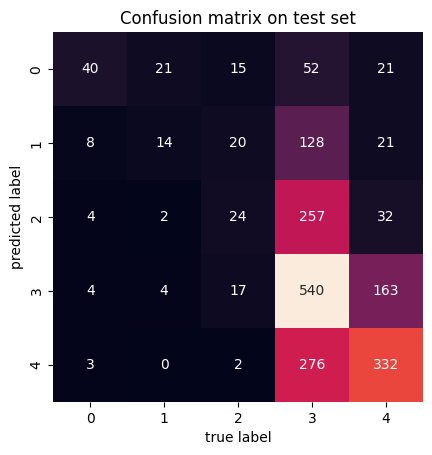

In [75]:
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
check_performance(clf_nb)

# Please answer the following questions before you close this assignment

##  1. What challenge(s) did you face in this assignment?



## 2. Is there anything you wish you could learn more about?



## 3. Is there anything you like most or least?

Please Rename your file as CSC325_Homework_4_FirstName_LastName.ipynb

# Done!